# Testing different Classification algorithms

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
!ls /home/andreag/Work/1.main_project/1.coacervsML/1.dataset_exploration/0.sliced_dataframe/

coacervate_starting_df_18032024_cleaned.csv  lys_asp_MWca_38.0_13.2_salt.png
coacervate_starting_df_18032024_lys_asp.csv  lys_asp_MWca_38.0_37.0.csv
lys_asp_MWca_16.525_37.0.csv		     lys_asp_MWca_38.0_37.0.png
lys_asp_MWca_16.525_37.0.png		     lys_asp_MWca_3.8_13.2.csv
lys_asp_MWca_38.0_13.2.csv		     lys_asp_MWca_3.8_13.2.png
lys_asp_MWca_38.0_13.2.png		     lys_asp_MWca_3.8_4.2.csv
lys_asp_MWca_38.0_13.2_salt.csv		     lys_asp_MWca_3.8_4.2.png


In [3]:
data_dir = '/home/andreag/Work/1.main_project/1.coacervsML/1.dataset_exploration/0.sliced_dataframe/'
dataset = 'lys_asp_MWca_3.8_13.2.csv'

_df = pd.read_csv(data_dir+dataset).drop(labels='Unnamed: 0', axis=1)

In [4]:
data_scaling = True

f0, f1, ft = ['Conc_Anion_C(C(C(=O)O)N)C(=O)O', 'Conc_Cation_C(CCN)CC(C(=O)O)N', 'Phase']

if data_scaling:
    print('Applying scaling')

    y = _df[ft]

    df = _df.drop(columns=ft)
    columns = df.columns
    df = StandardScaler().fit_transform(X=df)
    df = pd.DataFrame(data=df, columns=columns)

    X, X0, X1 = df[[f0,f1]], df[f0], df[f1]

else:
    print('No scaling')
    X, X0, X1, y = _df[[f0,f1]], _df[f0], _df[f1], _df[ft]

Applying scaling


In [5]:
# f0, f1, ft = ['Conc_Anion_C(C(C(=O)O)N)C(=O)O', 'Conc_Cation_C(CCN)CC(C(=O)O)N', 'Phase']
# X, X0, X1, y = df[[f0,f1]], df[f0], df[f1], df[ft]
# print(f'2 variables {f0,f1}')

In [6]:
X.info(), y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Conc_Anion_C(C(C(=O)O)N)C(=O)O  324 non-null    float64
 1   Conc_Cation_C(CCN)CC(C(=O)O)N   324 non-null    float64
dtypes: float64(2)
memory usage: 5.2 KB
<class 'pandas.core.series.Series'>
RangeIndex: 324 entries, 0 to 323
Series name: Phase
Non-Null Count  Dtype
--------------  -----
324 non-null    int64
dtypes: int64(1)
memory usage: 2.7 KB


(None, None)

In [7]:
start_idxs = [i for i,p in enumerate(y) if p != -1]
start_idxs

[0, 1, 2, 3, 4]

## Universal parameters

In [8]:
from acquisition import DecisionFunction

acqui_mode = 'exploration'
ac_func = DecisionFunction(mode=acqui_mode)

In [9]:
sampling_mode = 'FPS'
n_batch = 5

In [10]:
from learning import active_learning_cycle
from utils.beauty import plot_active_learning_cycle, plot_simple_al_output

## GPC

In [11]:
from classification import ClassifierModel
from classification import RBF

# define the classifier model
clf_model = 'GaussianProcessClassifier'

# specific parameters
clf_dict = dict(
    kernel=.5 * RBF(1.0), 
    random_state=73
)

al_clf = ClassifierModel(model=clf_model, **clf_dict)

In [12]:
new_idxs_fps = active_learning_cycle(
    feature_space=(X, y),               # starting training feature space (points, classes)
    idxs=start_idxs,                    # starting indexes
    new_batch=n_batch,                  # number of points in outcome
    clfModel=al_clf,                    # initialised classifier
    acquisitionFunc=ac_func,            # aquisition mode
    screeningSelection=sampling_mode    # sampling methods for the points acquisition
    )
new_idxs_fps

Found 81 points that shares the same acquisition criteria.
Selecting 5 by 'FPS' sampling.


[46, 323, 306, 175, 216]

/home/andreag/anaconda3/envs/coacerv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessClassifier was fitted with feature names
  warnings.warn(


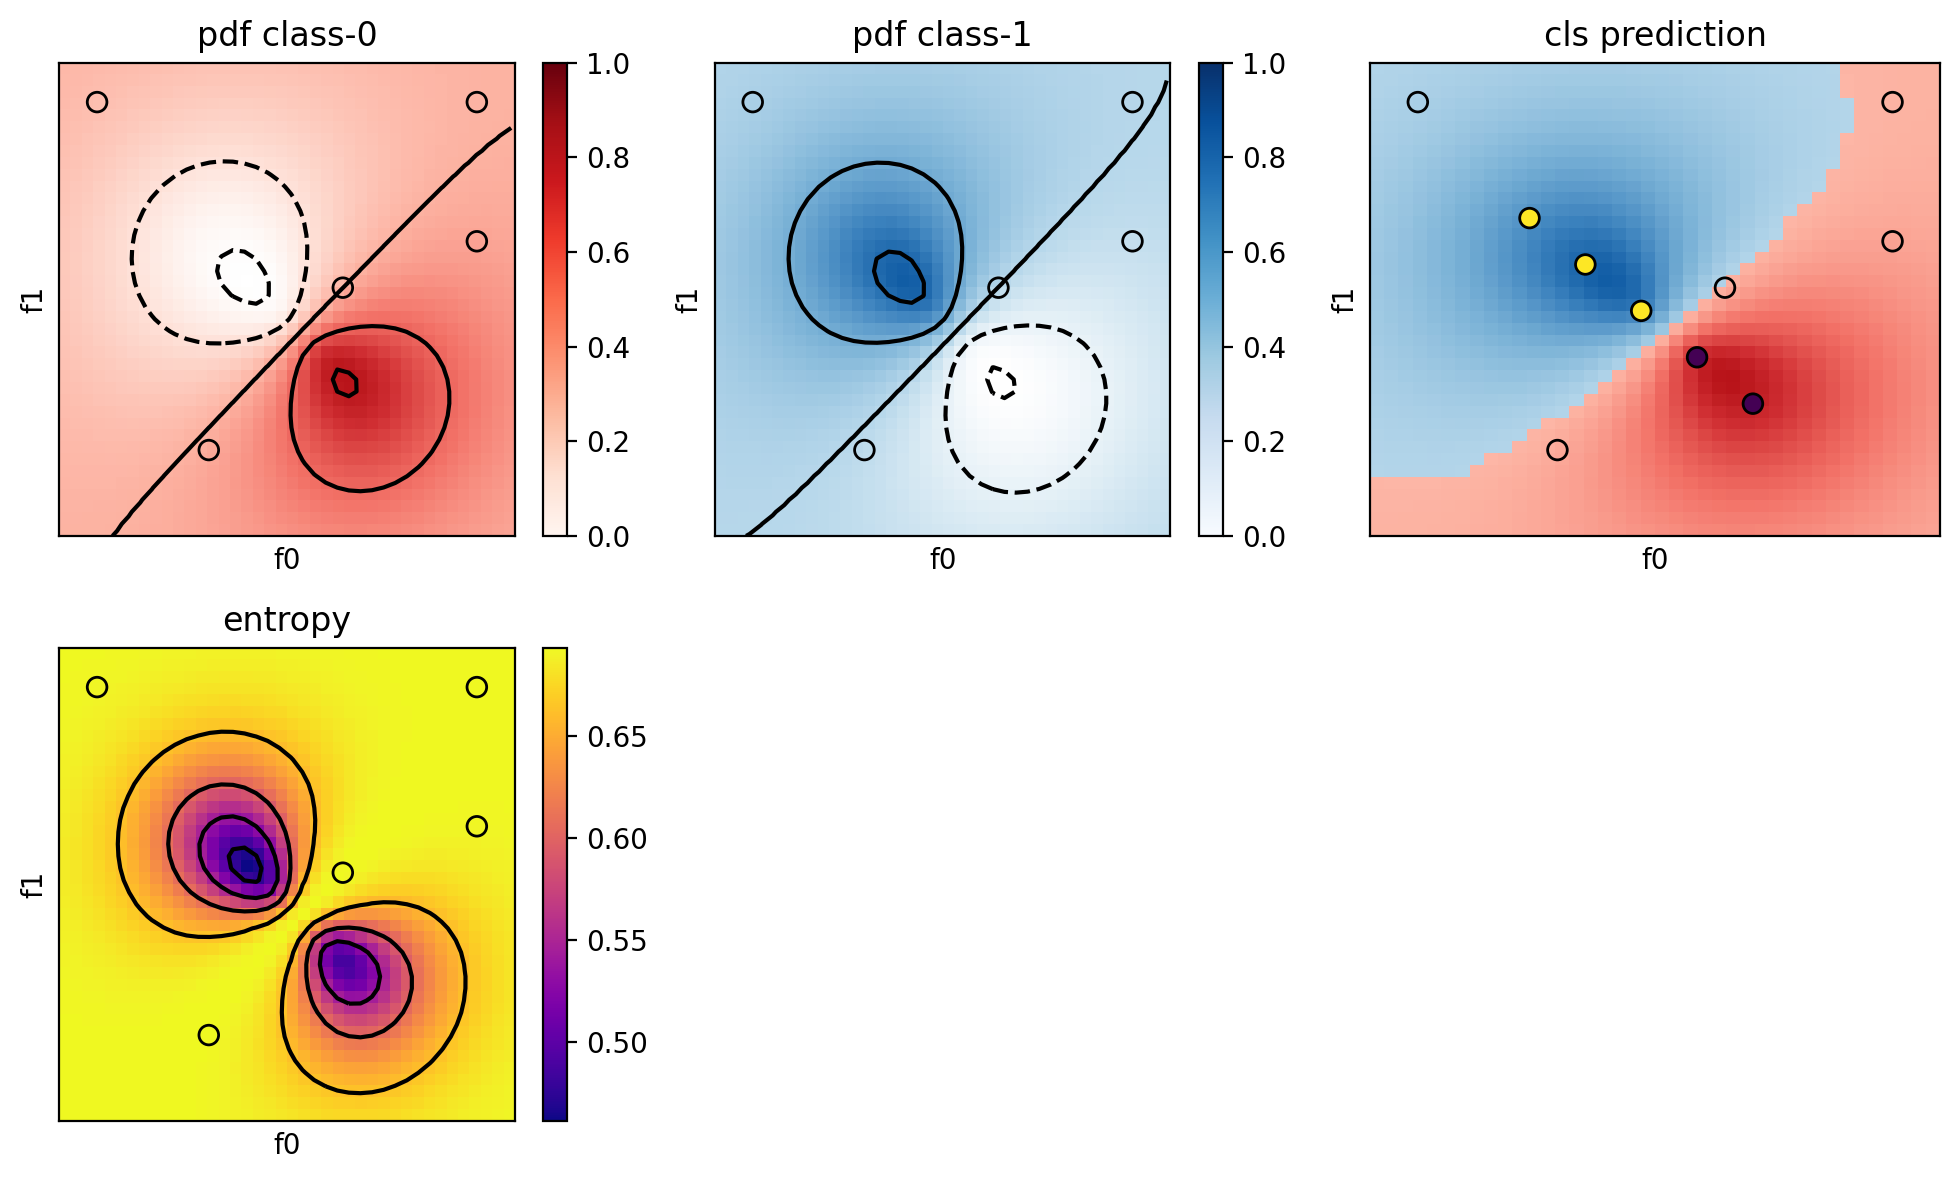

In [13]:
plot_active_learning_cycle(feature_space=(X0,X1,y),
                           clfModel=al_clf,
                           idxs=start_idxs,
                           new_idxs=new_idxs_fps
                           )

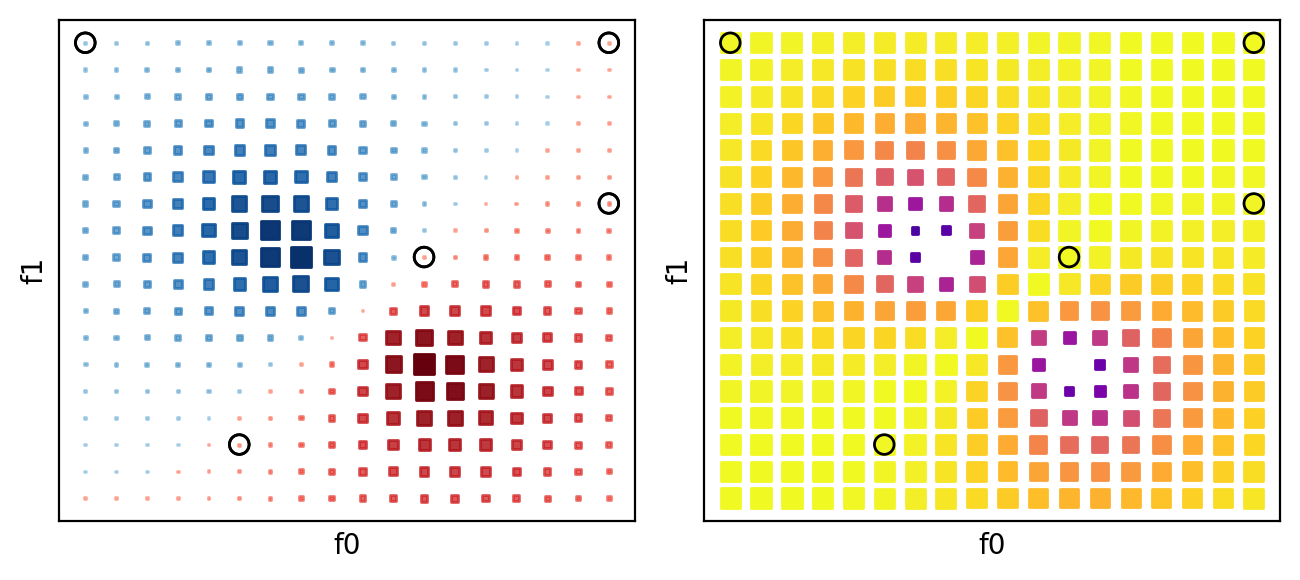

In [14]:
plot_simple_al_output(X=(X0,X1), 
                      Z=al_clf.predict_proba(X=X), 
                      new_idxs=new_idxs_fps,
                      minmaxScaling=True)

## Linear SVC

In [15]:
from classification import ClassifierModel

# define the classifier model
clf_model = 'SVC'

# specific parameters
clf_dict = dict(
    kernel='linear',
    probability=True,
    random_state=73
)

al_clf = ClassifierModel(model=clf_model, **clf_dict)

In [16]:
new_idxs_fps = active_learning_cycle(
    feature_space=(X, y),               # starting training feature space (points, classes)
    idxs=start_idxs,                    # starting indexes
    new_batch=n_batch,                  # number of points in outcome
    clfModel=al_clf,                    # initialised classifier
    acquisitionFunc=ac_func,            # aquisition mode
    screeningSelection=sampling_mode    # sampling methods for the points acquisition
    )
new_idxs_fps

Found 50 points that shares the same acquisition criteria.
Selecting 5 by 'FPS' sampling.


[210, 5, 323, 100, 249]

/home/andreag/anaconda3/envs/coacerv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


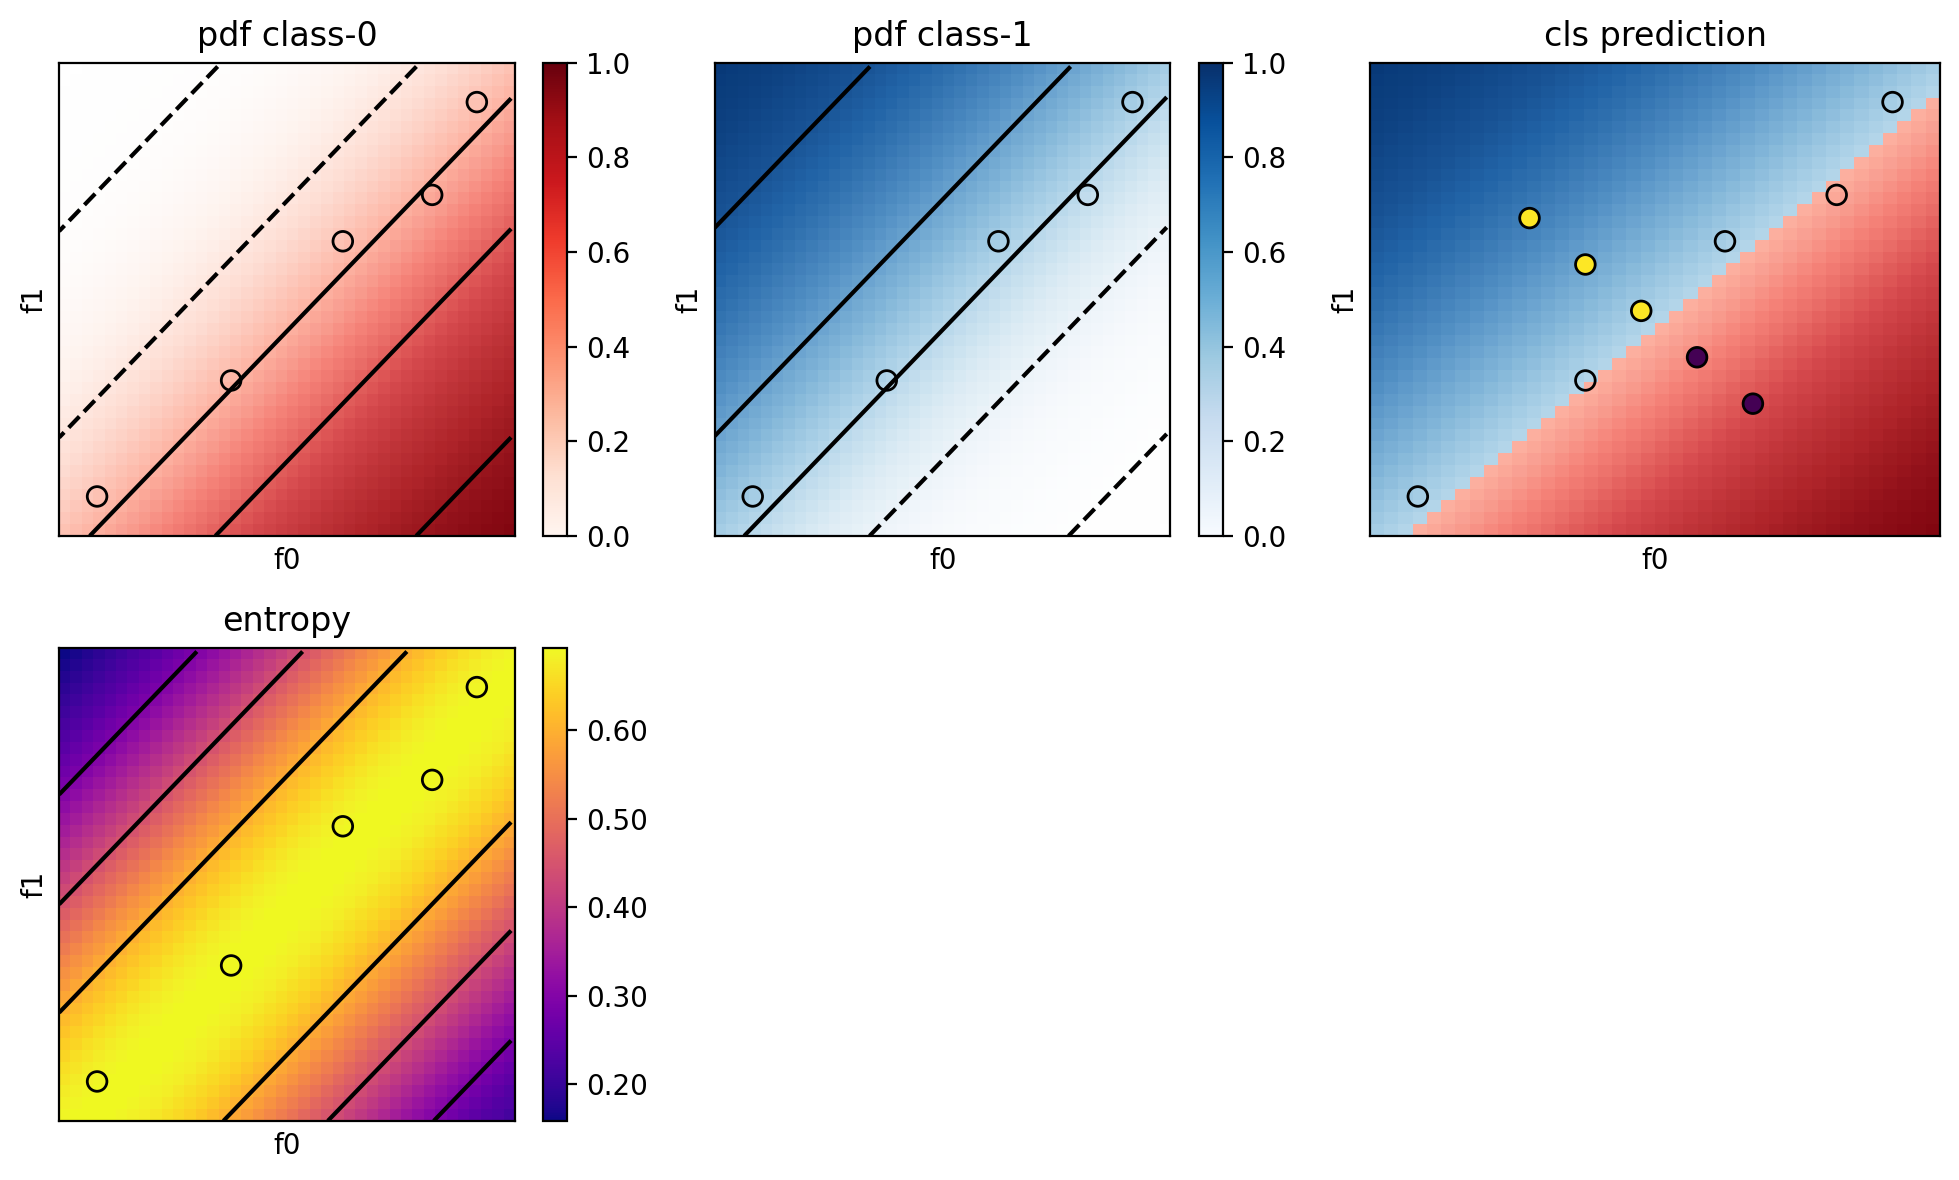

In [17]:
plot_active_learning_cycle(feature_space=(X0,X1,y),
                           clfModel=al_clf,
                           idxs=start_idxs,
                           new_idxs=new_idxs_fps
                           )

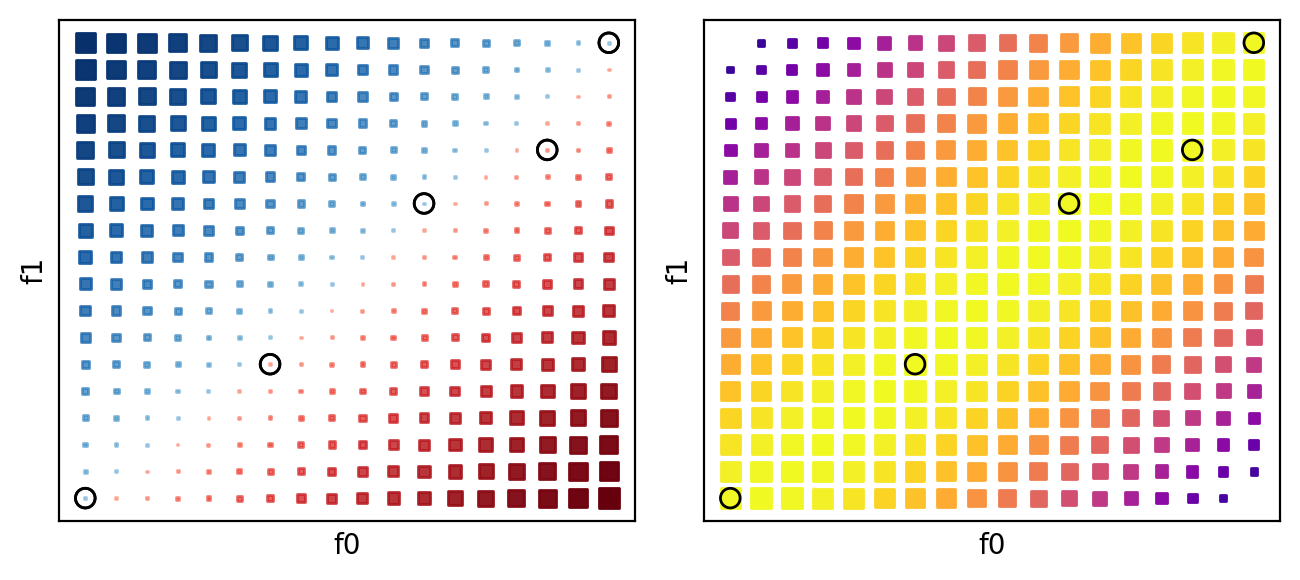

In [18]:
plot_simple_al_output(X=(X0,X1), 
                      Z=al_clf.predict_proba(X=X), 
                      new_idxs=new_idxs_fps,
                      minmaxScaling=True)

# SVC w RBF kernel

In [19]:
from classification import ClassifierModel

# define the classifier model
clf_model = 'SVC'

# specific parameters
clf_dict = dict(
    kernel='rbf',
    gamma='auto',
    probability=True,
    random_state=73
)

al_clf = ClassifierModel(model=clf_model, **clf_dict)

In [20]:
new_idxs_fps = active_learning_cycle(
    feature_space=(X, y),               # starting training feature space (points, classes)
    idxs=start_idxs,                    # starting indexes
    new_batch=n_batch,                  # number of points in outcome
    clfModel=al_clf,                    # initialised classifier
    acquisitionFunc=ac_func,            # aquisition mode
    screeningSelection=sampling_mode    # sampling methods for the points acquisition
    )
new_idxs_fps

Found 54 points that shares the same acquisition criteria.
Selecting 5 by 'FPS' sampling.


[175, 5, 323, 83, 232]

/home/andreag/anaconda3/envs/coacerv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


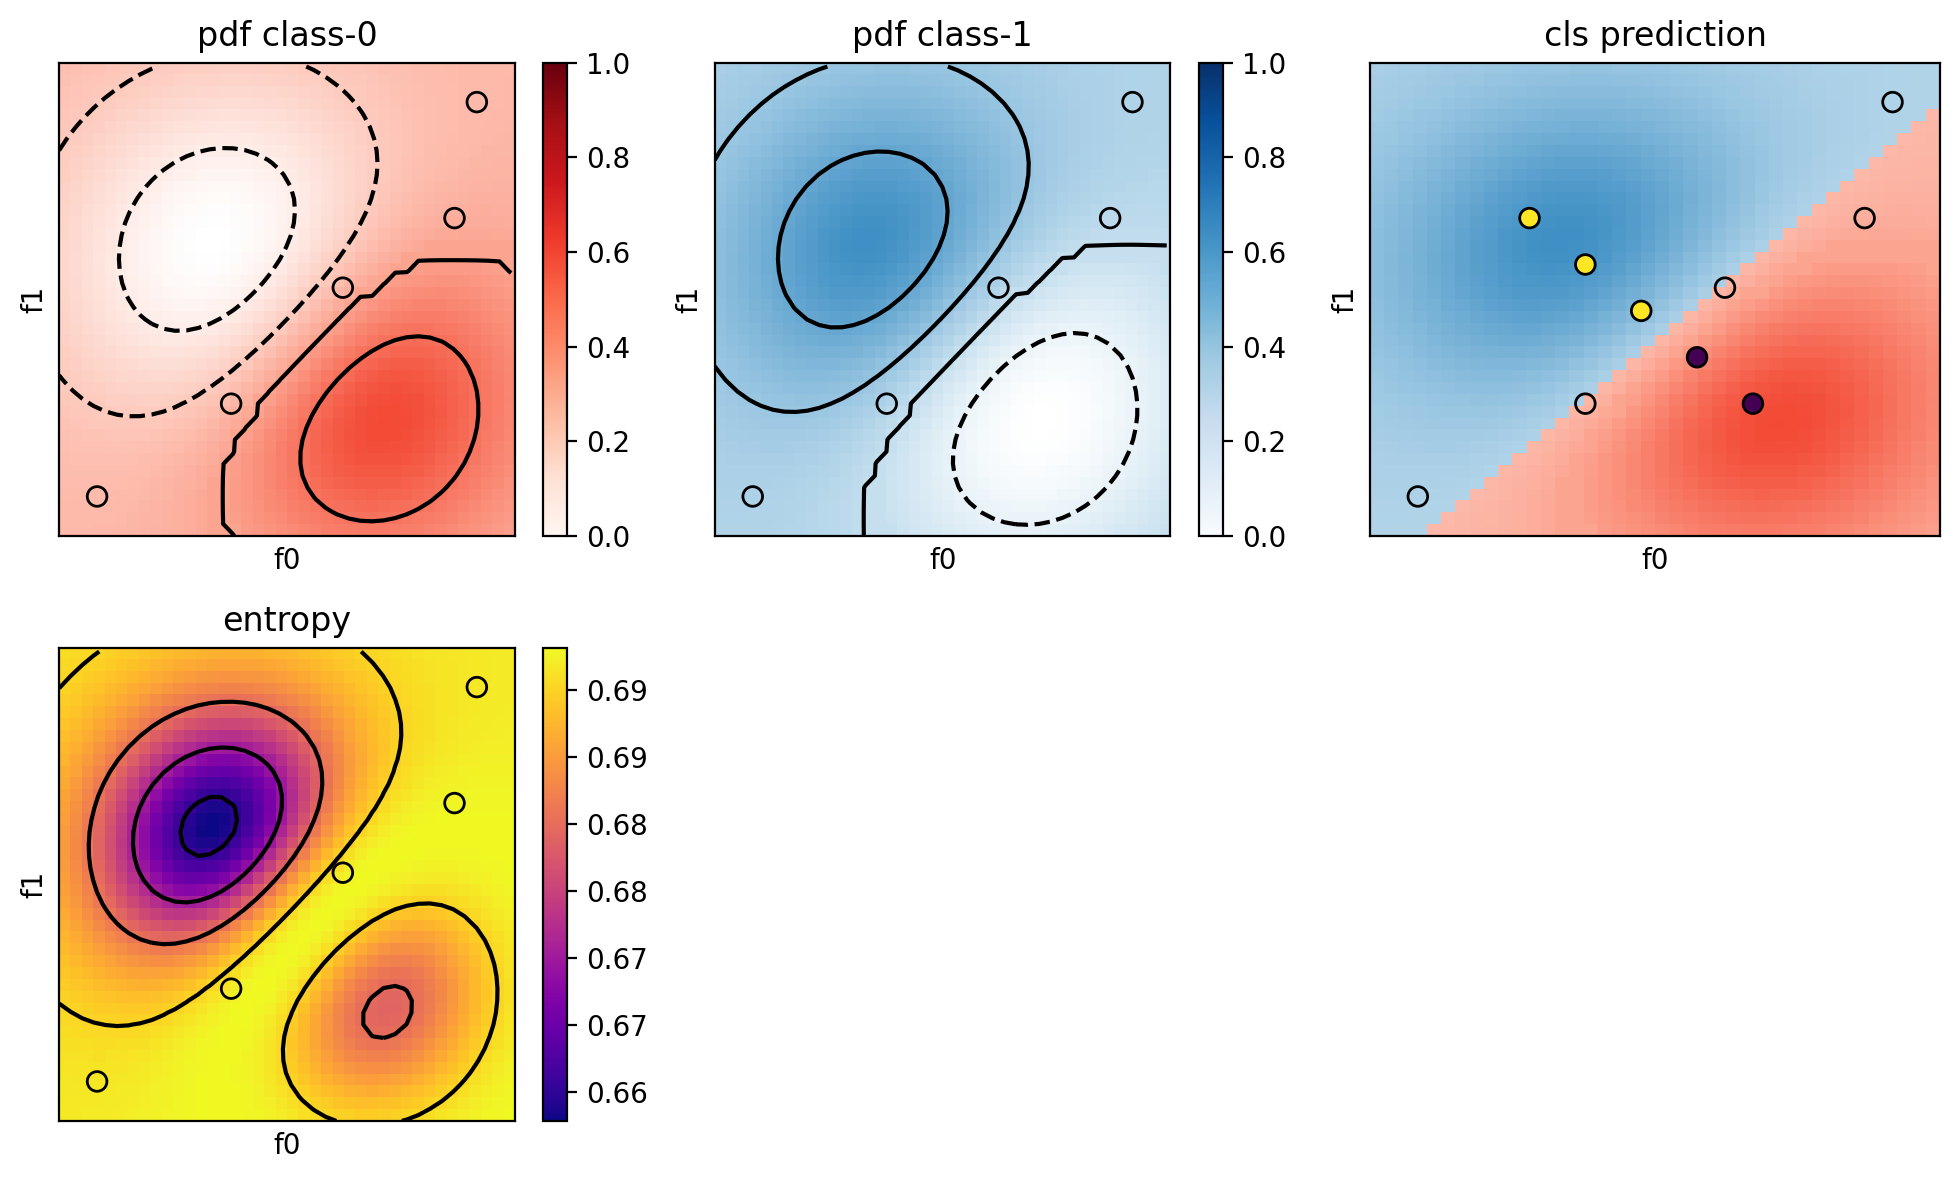

In [21]:
plot_active_learning_cycle(feature_space=(X0,X1,y),
                           clfModel=al_clf,
                           idxs=start_idxs,
                           new_idxs=new_idxs_fps
                           )

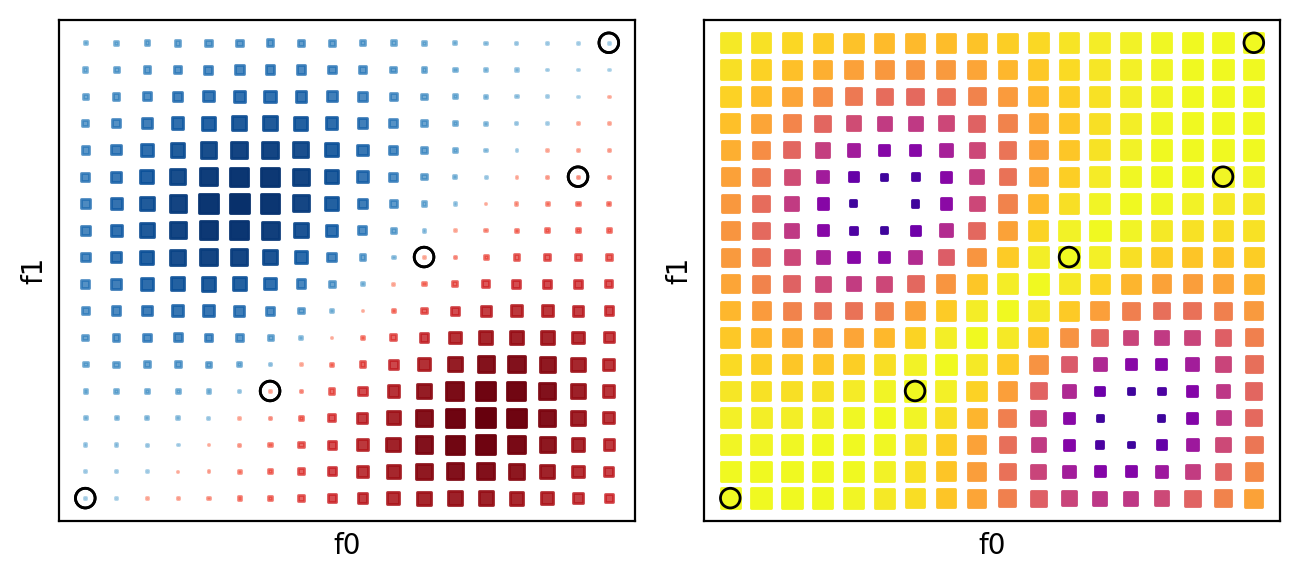

In [22]:
plot_simple_al_output(X=(X0,X1), 
                      Z=al_clf.predict_proba(X=X), 
                      new_idxs=new_idxs_fps,
                      minmaxScaling=True)

## Naive Bayes

In [23]:
from classification import ClassifierModel

# define the classifier model
clf_model = 'NaiveBayes'

# specific parameters
clf_dict = None

al_clf = ClassifierModel(model=clf_model)

In [24]:
new_idxs_fps = active_learning_cycle(
    feature_space=(X, y),               # starting training feature space (points, classes)
    idxs=start_idxs,                    # starting indexes
    new_batch=n_batch,                  # number of points in outcome
    clfModel=al_clf,                    # initialised classifier
    acquisitionFunc=ac_func,            # aquisition mode
    screeningSelection=sampling_mode    # sampling methods for the points acquisition
    )
new_idxs_fps

[138, 177, 179, 30, 66]

/home/andreag/anaconda3/envs/coacerv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


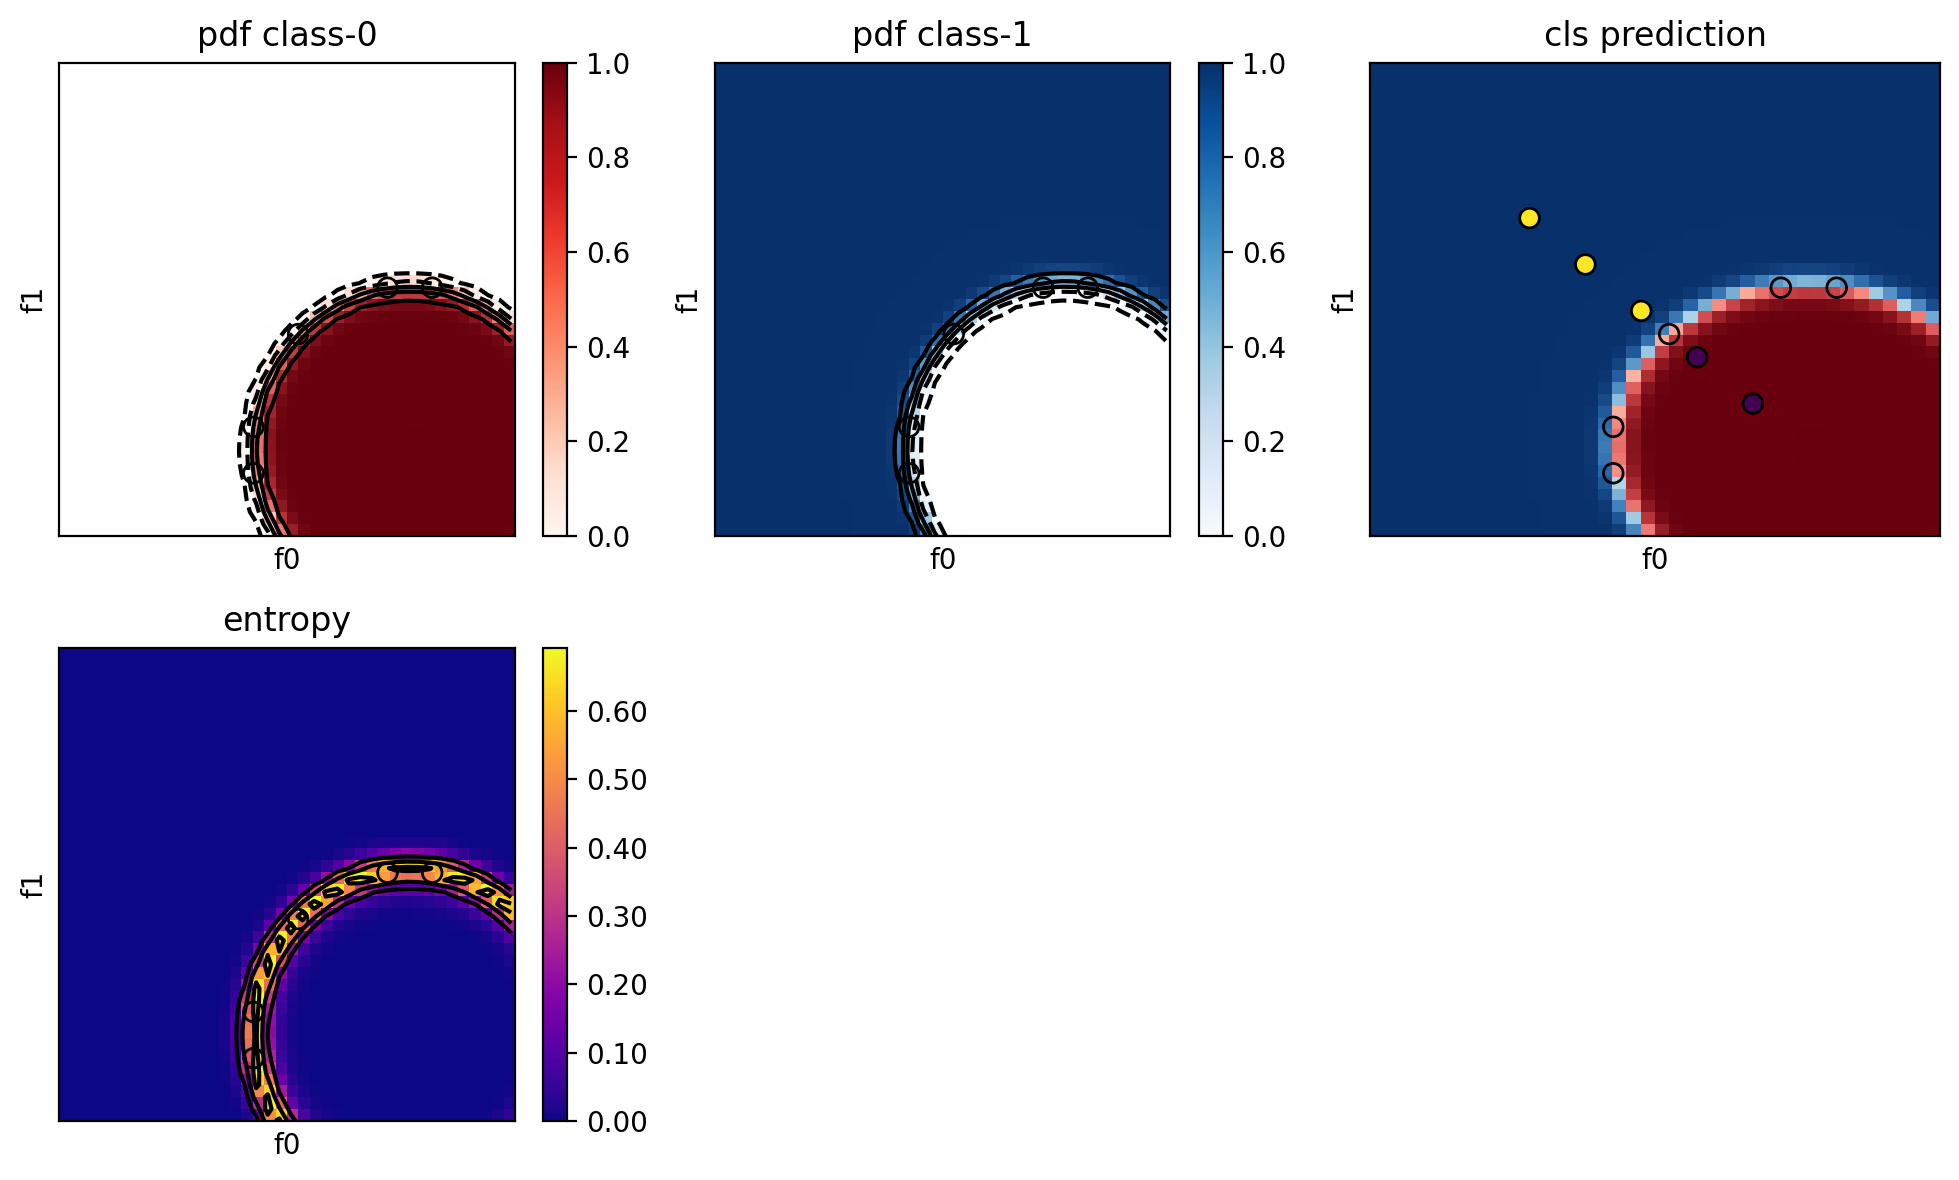

In [25]:
plot_active_learning_cycle(feature_space=(X0,X1,y),
                           clfModel=al_clf,
                           idxs=start_idxs,
                           new_idxs=new_idxs_fps
                           )

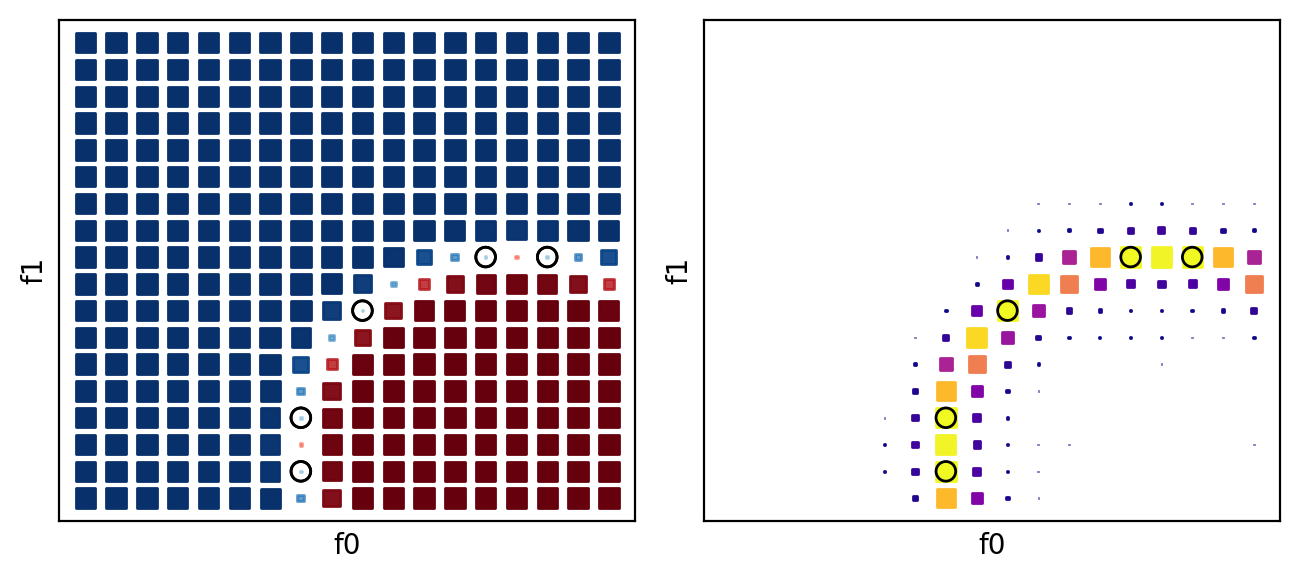

In [26]:
plot_simple_al_output(X=(X0,X1), 
                      Z=al_clf.predict_proba(X=X), 
                      new_idxs=new_idxs_fps,
                      minmaxScaling=True)

## Random Forest

In [27]:
from classification import ClassifierModel

# define the classifier model
clf_model = 'RandomForest'

# specific parameters
clf_dict = dict(
    random_state = 73,
    max_depth=5, 
    n_estimators=10, 
    max_features=1,
)

al_clf = ClassifierModel(model=clf_model)

In [28]:
new_idxs_fps = active_learning_cycle(
    feature_space=(X, y),               # starting training feature space (points, classes)
    idxs=start_idxs,                    # starting indexes
    new_batch=n_batch,                  # number of points in outcome
    clfModel=al_clf,                    # initialised classifier
    acquisitionFunc=ac_func,            # aquisition mode
    screeningSelection=sampling_mode    # sampling methods for the points acquisition
    )
new_idxs_fps

Found 137 points that shares the same acquisition criteria.
Selecting 5 by 'FPS' sampling.


[319, 5, 138, 181, 13]

/home/andreag/anaconda3/envs/coacerv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


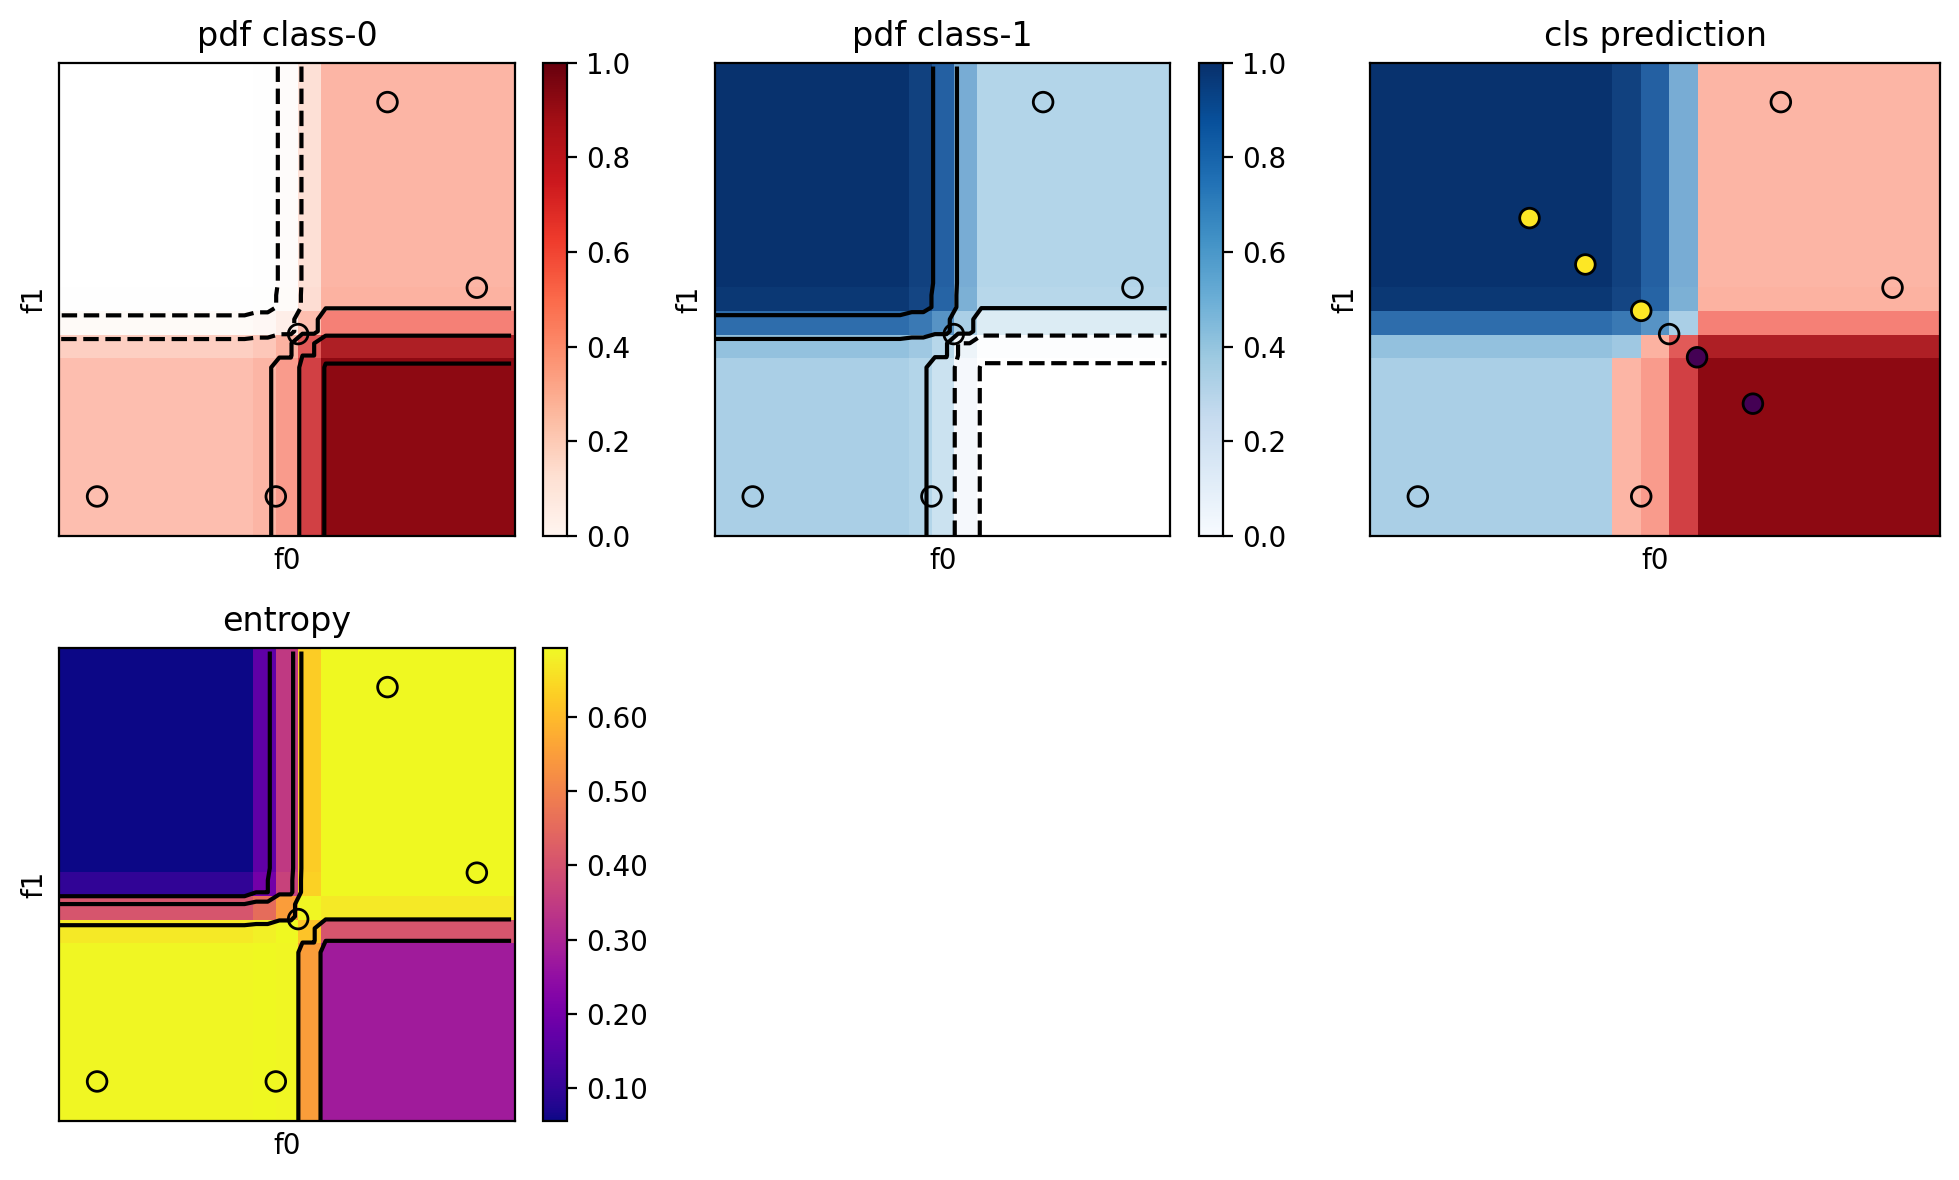

In [29]:
plot_active_learning_cycle(feature_space=(X0,X1,y),
                           clfModel=al_clf,
                           idxs=start_idxs,
                           new_idxs=new_idxs_fps
                           )

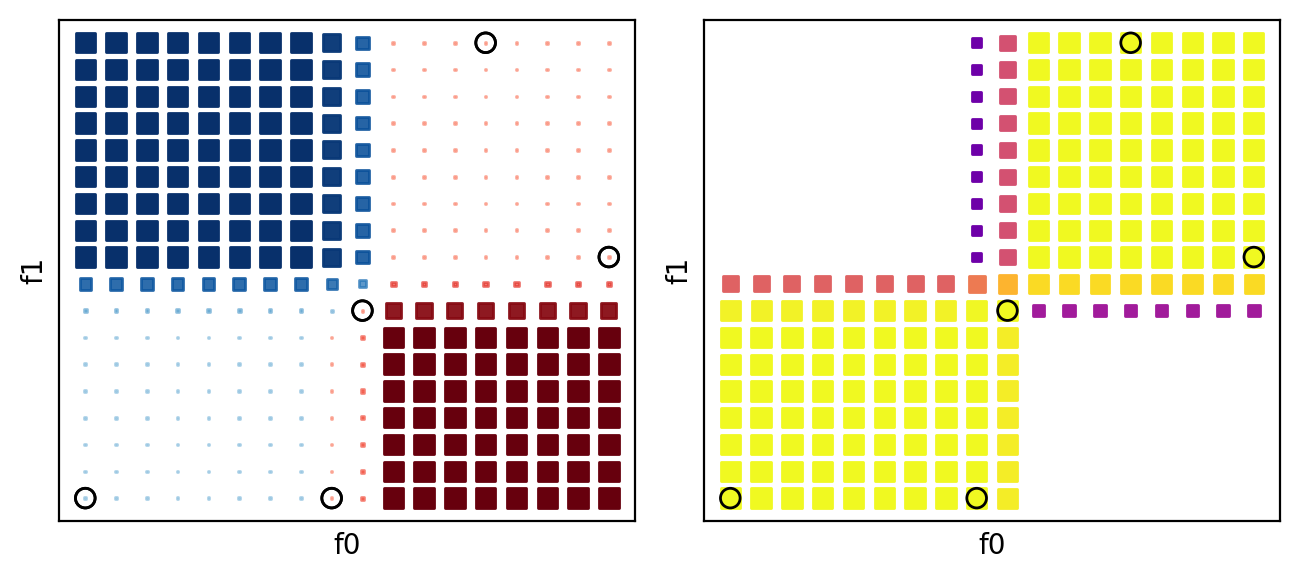

In [30]:
plot_simple_al_output(X=(X0,X1), 
                      Z=al_clf.predict_proba(X=X), 
                      new_idxs=new_idxs_fps,
                      minmaxScaling=True)

## AdaBoost

In [31]:
from classification import ClassifierModel

# define the classifier model
clf_model = 'AdaBoost'

# specific parameters
clf_dict = dict(
    algorithm="SAMME", 
    random_state=73
)

al_clf = ClassifierModel(model=clf_model)

In [32]:
new_idxs_fps = active_learning_cycle(
    feature_space=(X, y),               # starting training feature space (points, classes)
    idxs=start_idxs,                    # starting indexes
    new_batch=n_batch,                  # number of points in outcome
    clfModel=al_clf,                    # initialised classifier
    acquisitionFunc=ac_func,            # aquisition mode
    screeningSelection=sampling_mode    # sampling methods for the points acquisition
    )
new_idxs_fps

Found 319 points that shares the same acquisition criteria.
Selecting 5 by 'FPS' sampling.


/home/andreag/anaconda3/envs/coacerv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[162, 306, 6, 317, 16]

/home/andreag/anaconda3/envs/coacerv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


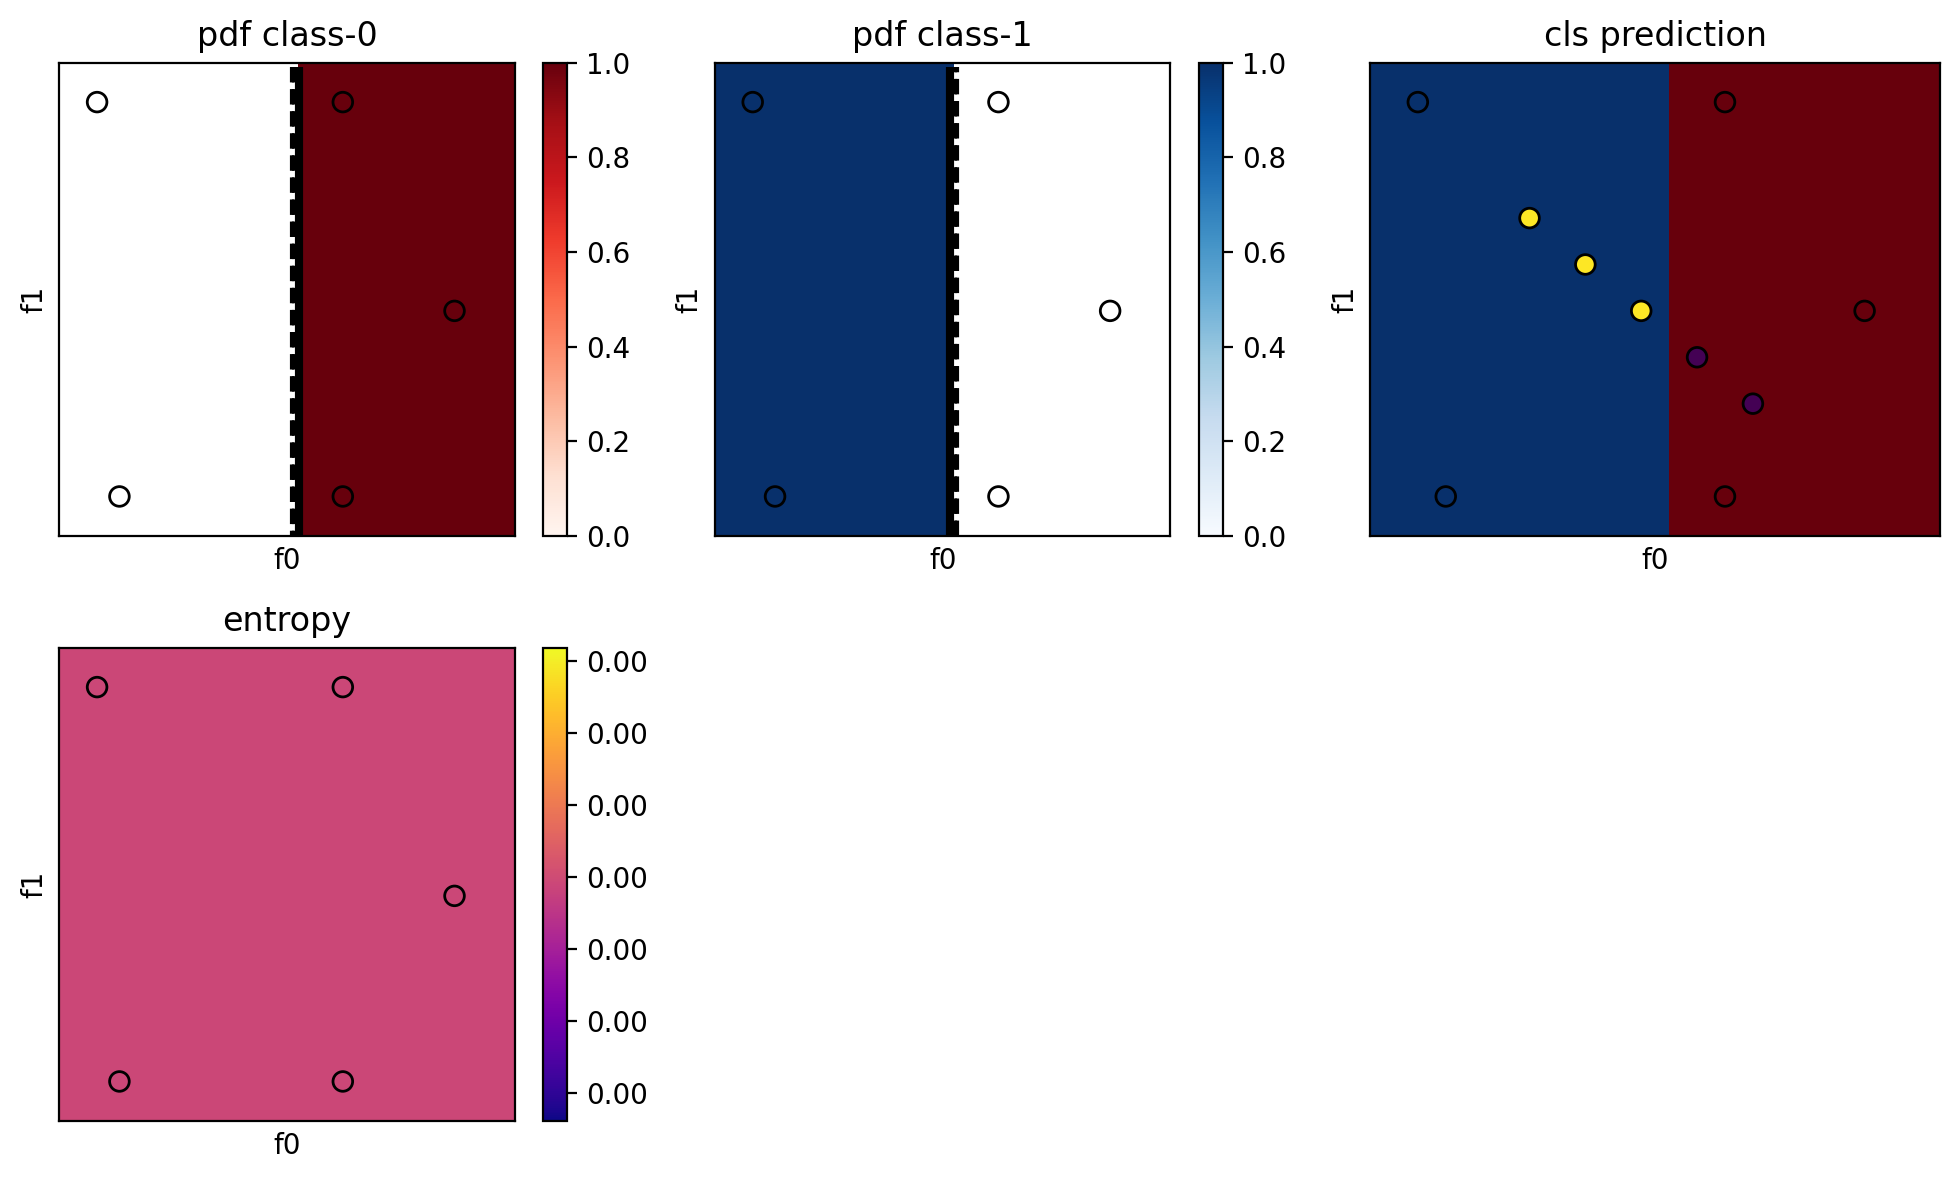

In [33]:
plot_active_learning_cycle(feature_space=(X0,X1,y),
                           clfModel=al_clf,
                           idxs=start_idxs,
                           new_idxs=new_idxs_fps
                           )

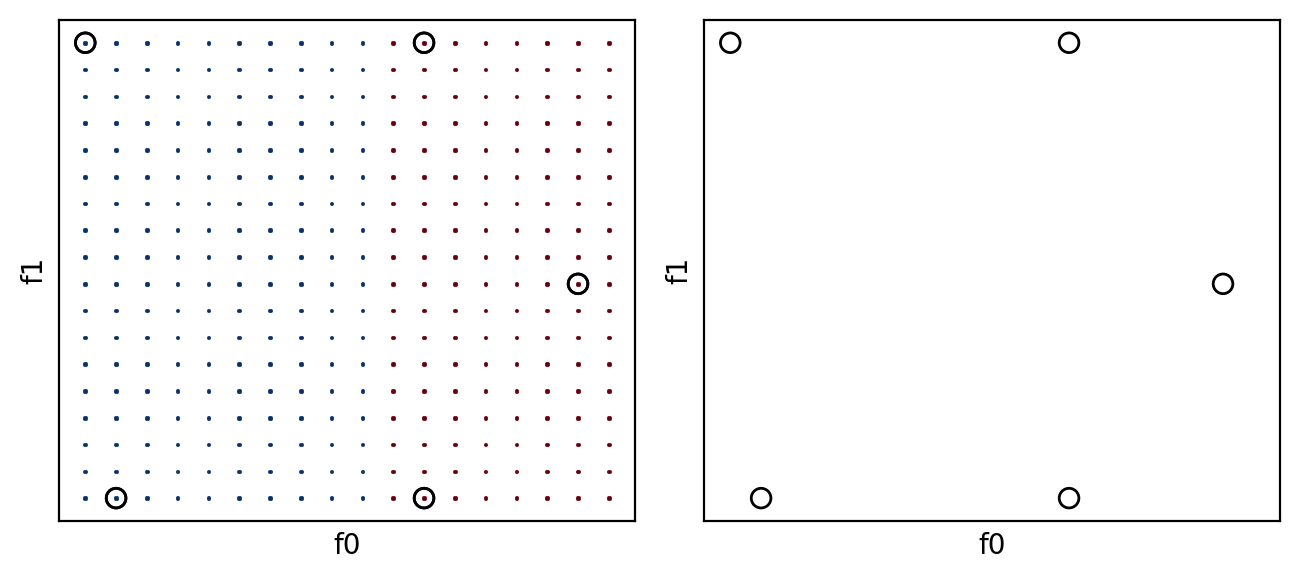

In [34]:
plot_simple_al_output(X=(X0,X1), 
                      Z=al_clf.predict_proba(X=X), 
                      new_idxs=new_idxs_fps,
                      minmaxScaling=True)

## MLPClassifier

In [57]:
from classification import ClassifierModel

# define the classifier model
clf_model = 'MLPC'

# specific parameters
clf_dict = dict(
    hidden_layer_sizes=(16,32,64),
    learning_rate='adaptive',
    alpha=1, 
    max_iter=1000, 
    random_state=73
)

al_clf = ClassifierModel(model=clf_model)

In [58]:
new_idxs_fps = active_learning_cycle(
    feature_space=(X, y),               # starting training feature space (points, classes)
    idxs=start_idxs,                    # starting indexes
    new_batch=n_batch,                  # number of points in outcome
    clfModel=al_clf,                    # initialised classifier
    acquisitionFunc=ac_func,            # aquisition mode
    screeningSelection=sampling_mode    # sampling methods for the points acquisition
    )
new_idxs_fps

Found 15 points that shares the same acquisition criteria.
Selecting 5 by 'FPS' sampling.


/home/andreag/anaconda3/envs/coacerv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[26, 322, 192, 101, 247]

/home/andreag/anaconda3/envs/coacerv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


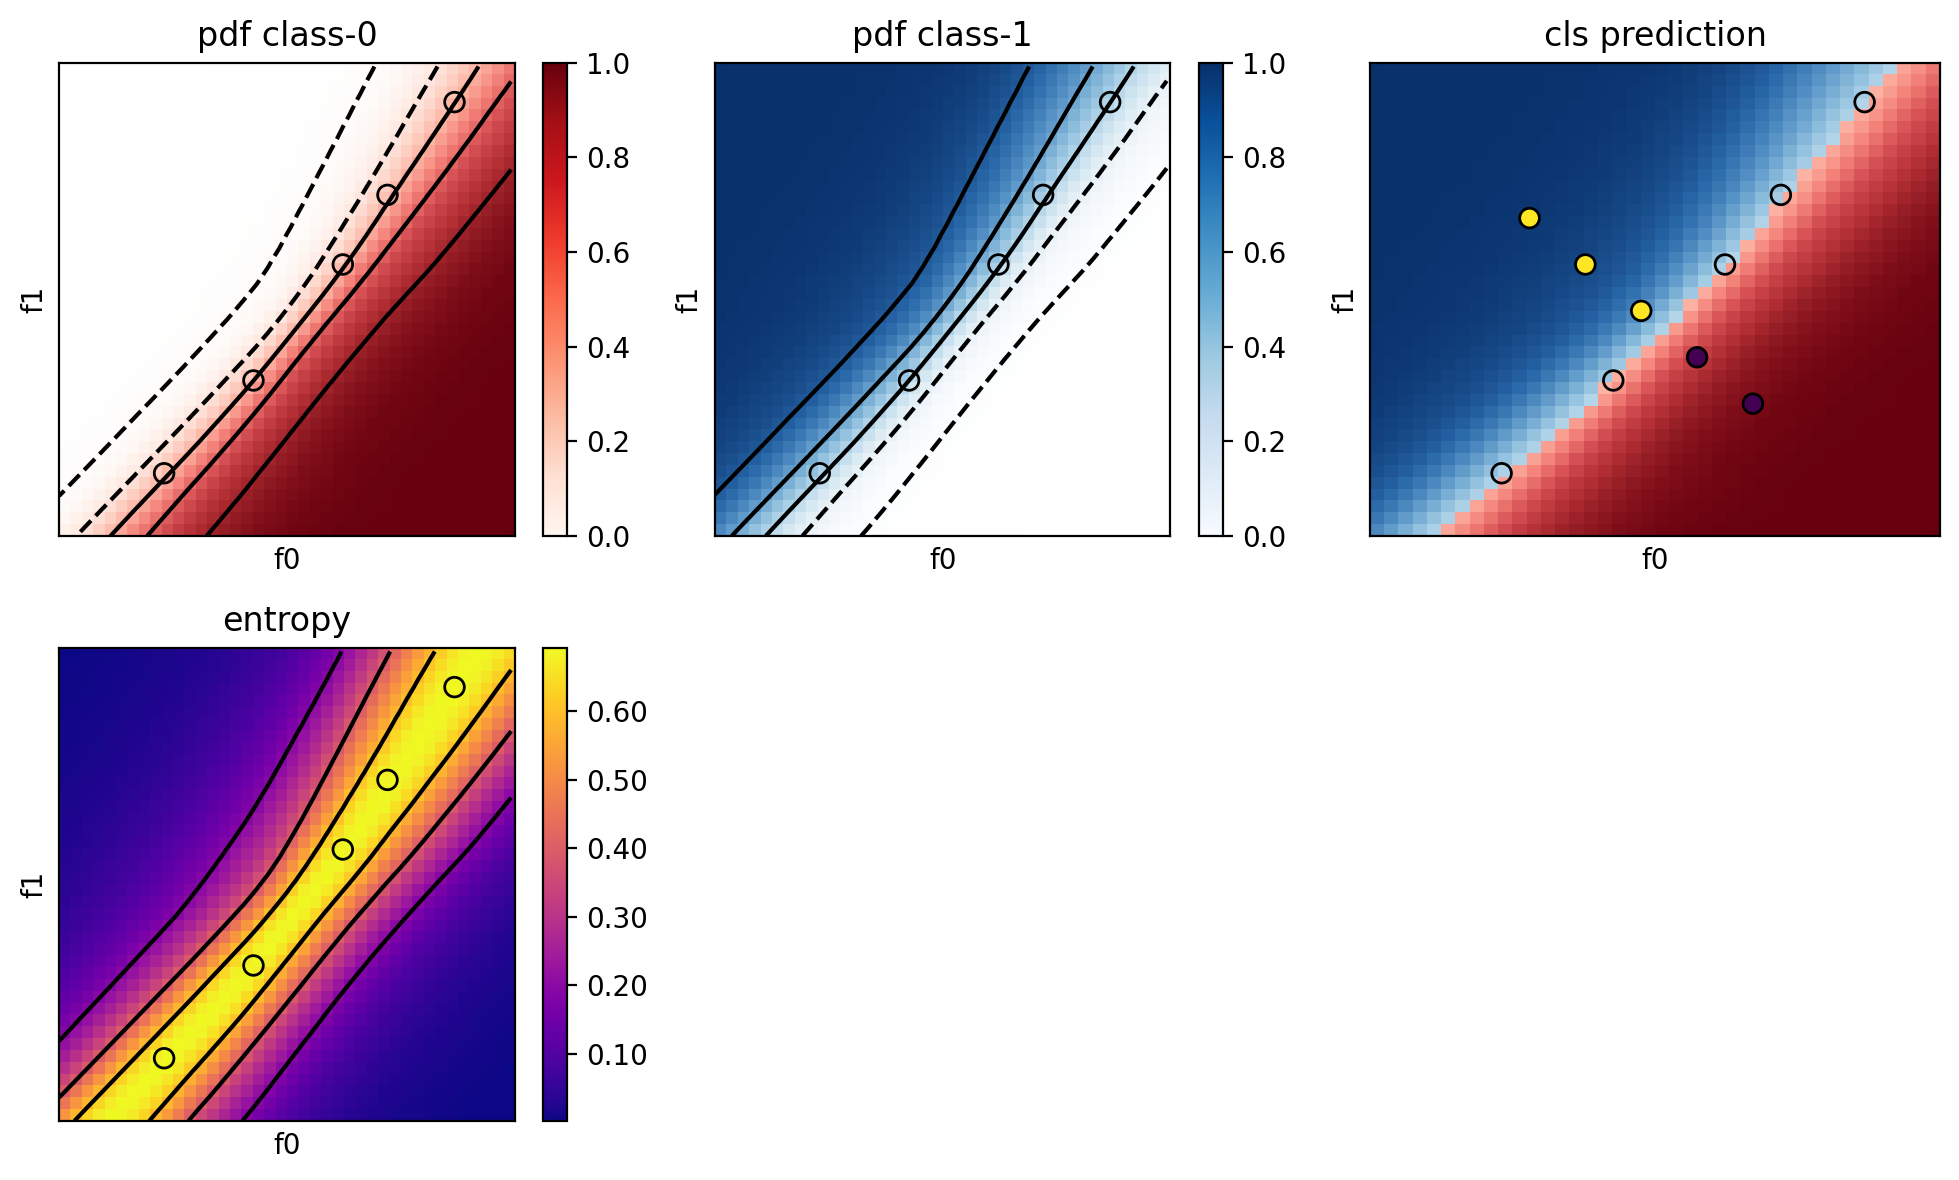

In [59]:
plot_active_learning_cycle(feature_space=(X0,X1,y),
                           clfModel=al_clf,
                           idxs=start_idxs,
                           new_idxs=new_idxs_fps
                           )

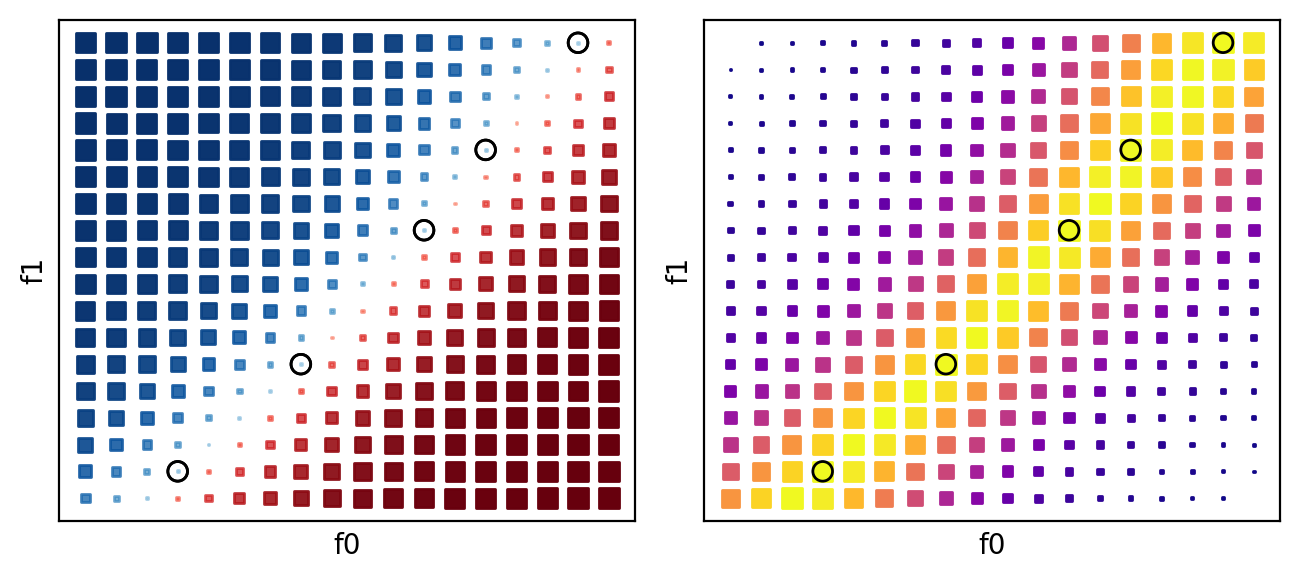

In [60]:
plot_simple_al_output(X=(X0,X1), 
                      Z=al_clf.predict_proba(X=X), 
                      new_idxs=new_idxs_fps,
                      minmaxScaling=True)

## Gboost

In [39]:
from classification import ClassifierModel

# define the classifier model
clf_model = 'GBoost'

# specific parameters
clf_dict = dict(
    random_state=73
)

al_clf = ClassifierModel(model=clf_model)

In [40]:
new_idxs_fps = active_learning_cycle(
    feature_space=(X, y),               # starting training feature space (points, classes)
    idxs=start_idxs,                    # starting indexes
    new_batch=n_batch,                  # number of points in outcome
    clfModel=al_clf,                    # initialised classifier
    acquisitionFunc=ac_func,            # aquisition mode
    screeningSelection=sampling_mode    # sampling methods for the points acquisition
    )
new_idxs_fps

Found 80 points that shares the same acquisition criteria.
Selecting 5 by 'FPS' sampling.


[25, 138, 14, 129, 99]

/home/andreag/anaconda3/envs/coacerv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


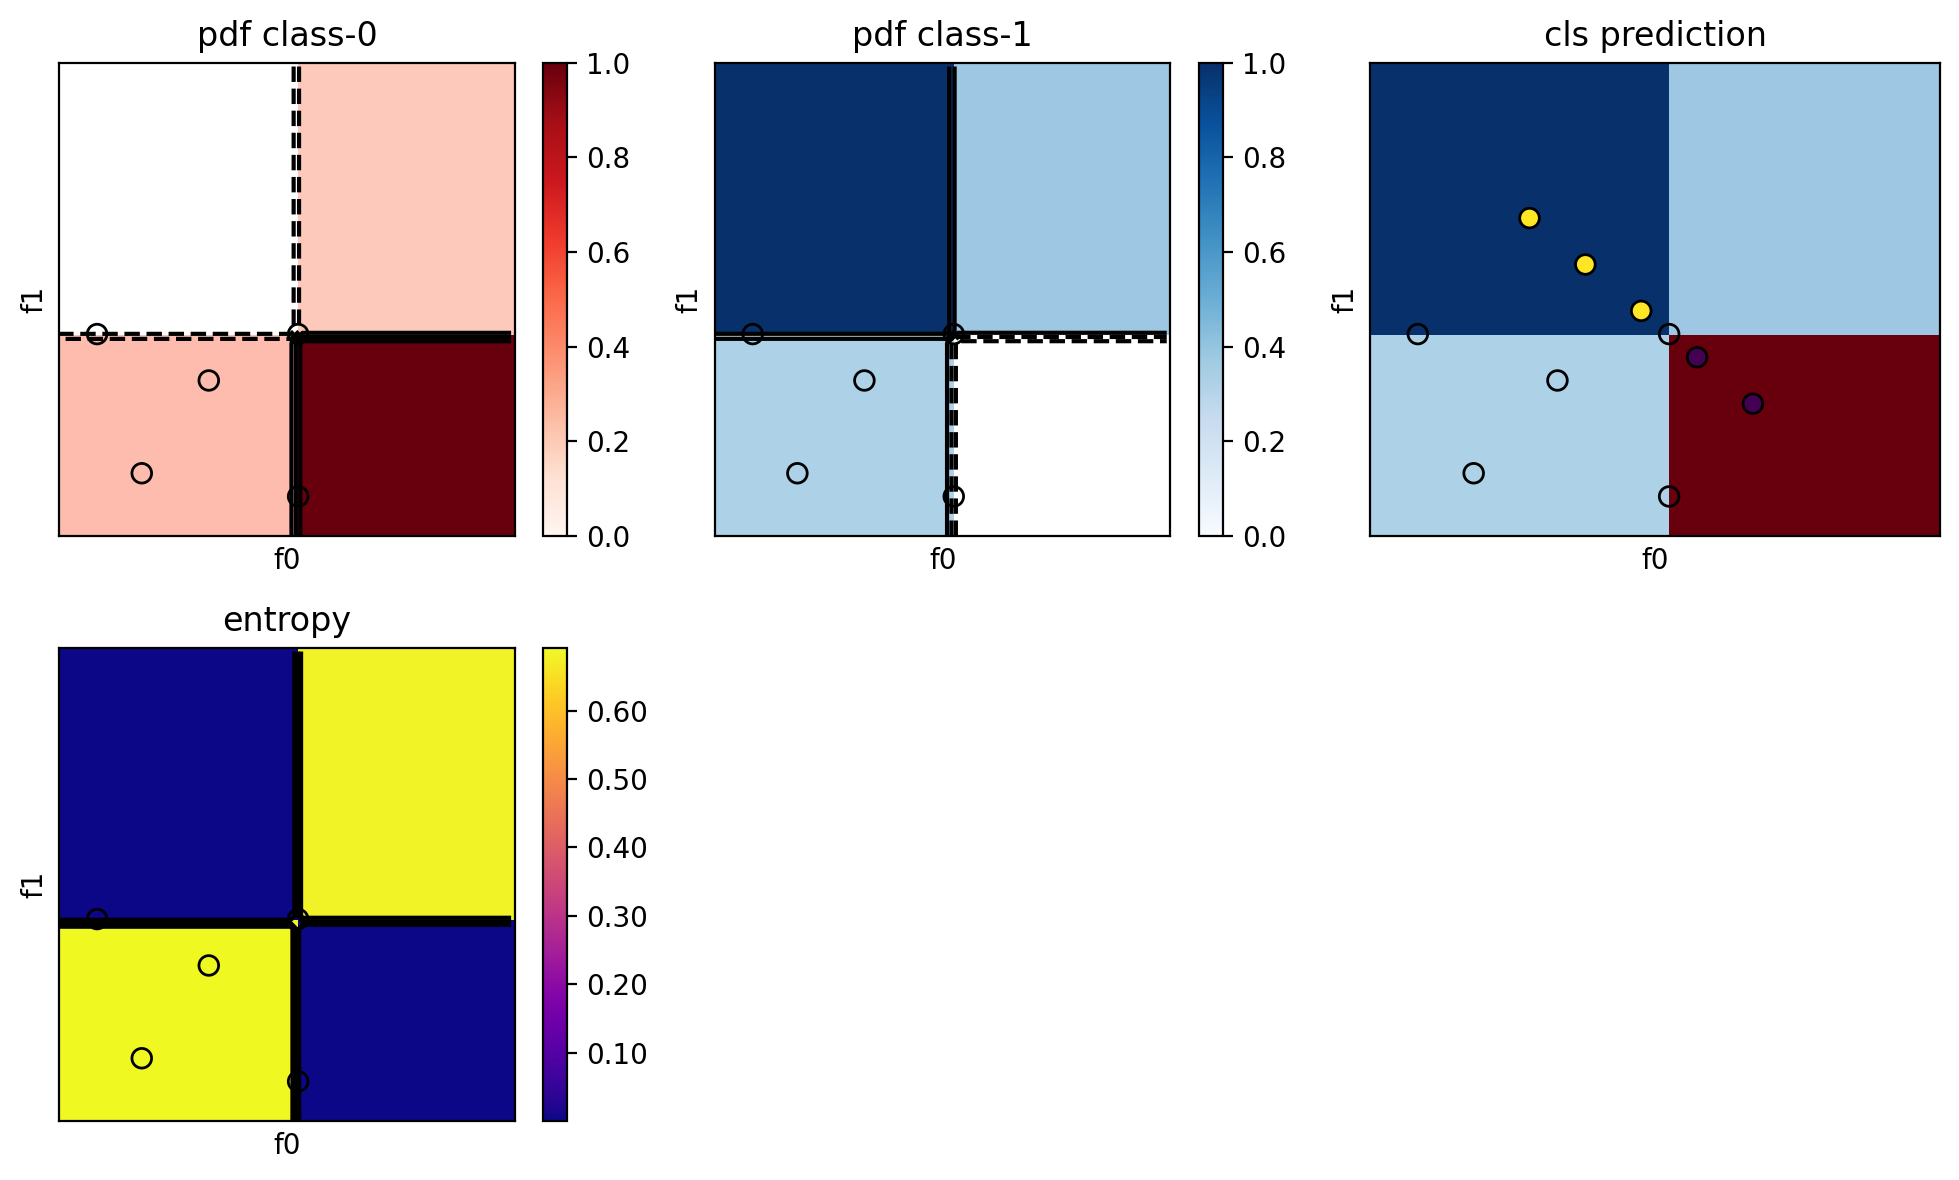

In [41]:
plot_active_learning_cycle(feature_space=(X0,X1,y),
                           clfModel=al_clf,
                           idxs=start_idxs,
                           new_idxs=new_idxs_fps
                           )

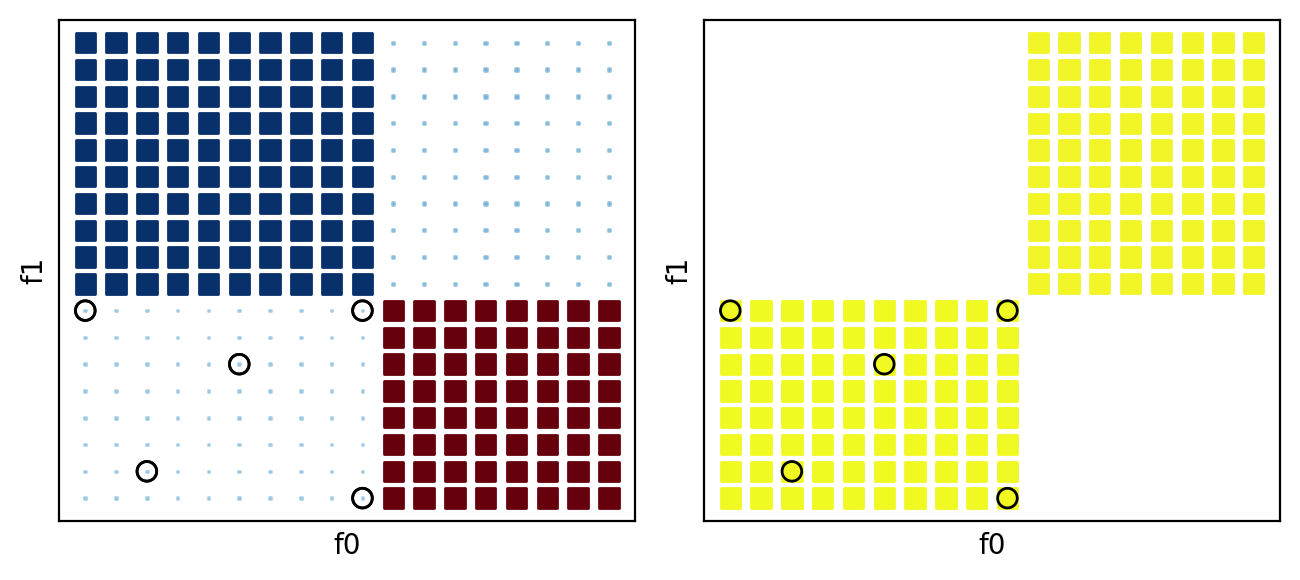

In [42]:
plot_simple_al_output(X=(X0,X1), 
                      Z=al_clf.predict_proba(X=X), 
                      new_idxs=new_idxs_fps,
                      minmaxScaling=True)